In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../../Files/cement_slump.csv")


In [3]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


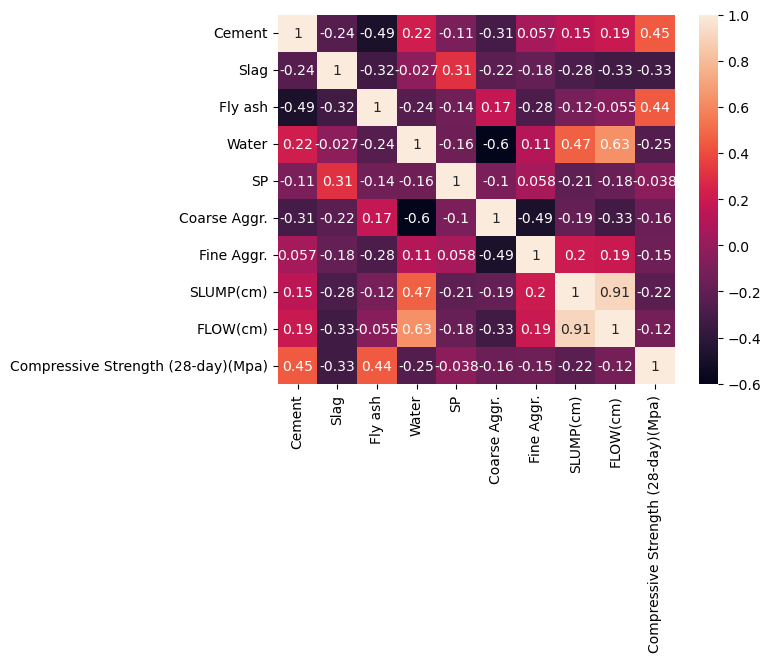

In [6]:

sb.heatmap(df.corr(), annot=True)
plt.savefig("Correlation heatmap.png")


In [7]:
df.columns


Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [8]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis=1)


In [9]:
y = df["Compressive Strength (28-day)(Mpa)"]


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)


In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()


In [14]:
scaled_X_train = scaler.fit_transform(X_train)


In [15]:
scaled_X_test = scaler.transform(X_test)


In [16]:
from sklearn.svm import SVR


In [17]:
model = SVR()


In [18]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1], "kernel": ["linear", "rbf", "poly"], "gamma": [
    "scale", "auto"], "degree": [2, 3, 4], "epsilon": [0, 0.01, 0.1, 0.5, 1, 2]}


In [19]:
from sklearn.model_selection import GridSearchCV


In [20]:
grid = GridSearchCV(model, param_grid)


In [21]:
grid.fit(scaled_X_train, y_train)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [22]:
grid.best_params_


{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [23]:
prediction = grid.predict(scaled_X_test)


In [25]:
prediction


array([20.39710091, 38.61832633, 32.55457617, 30.34401581, 46.35663548,
       38.53814843, 33.8672516 , 40.25885413, 37.92017232, 50.0907585 ,
       37.59938866, 31.19047761, 28.9592289 , 35.54472932, 44.64694045,
       46.73478893, 45.60228167, 36.35972701, 31.04354039, 34.3730726 ,
       42.39652393, 39.14709188, 33.71510905, 31.99037892, 49.84740118,
       39.07284116, 30.38381941, 28.99204115, 39.08726461, 32.20584581,
       31.98145726])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [27]:
mean_absolute_error(y_test, prediction)


2.5128012210762365

In [28]:
np.sqrt(mean_squared_error(y_test, prediction))


3.178210305119858